In [13]:
### Import the required libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

import tensorflow as tf
import tensorflow.keras as keras
import innvestigate
tf.compat.v1.disable_eager_execution()

import os
import sys

import xarray as xr
import xmitgcm
from xmitgcm import open_mdsdataset

# Append to sys.path the absolute path to src/XAIRT
path_list = os.path.abspath('').split('/')
path_src_XAIRT = ''
for link in path_list[:-1]:
    path_src_XAIRT = path_src_XAIRT+link+'/'
sys.path.append(path_src_XAIRT+'/src')

# Now import module XAIRT
from XAIRT import *

# See if GPUs are available
from keras import backend as K
if bool(K._get_available_gpus()):
    print("Running on GPU")
else:
    print("Running on CPU")

Running on GPU


In [2]:
### Corresponds to grid point index (ny,nx) = (32,58)
costLon = 240
costLat = 50

nx = 90
ny = 40
nz = 15

In [3]:
#### SAVING DATA INTO XARRAY DATASET ####
#### SAVING XARRAY DATASET AS NC FILE ####

# mainDir = '/scratch2/shreyas/global_oce_latlon_4x4'

# gridDir = mainDir + '/run_spinup/GRID'

# DataDirs = [mainDir + '/run_forward_50yr_dailydump_pk000059400/diags/untarred_output',
#              mainDir + '/run_forward_50yr_dailydump_pk000061200/diags/untarred_output']

# files_list_TS = []
# files_list_2Datm = []
# init_indices = [594001, 612001]
# length_rec = 18000

# for i in range(length_rec):
#     index = init_indices[0] + i
#     files_list_TS.append(DataDirs[0] + '/' + f'state3d_TS.0000{index:6d}.data')
#     files_list_2Datm.append(DataDirs[0] + '/' + f'state2d_atm.0000{index:6d}.data')
# for i in range(length_rec):
#     index = init_indices[1] + i
#     files_list_TS.append(DataDirs[1] + '/' + f'state3d_TS.0000{index:6d}.data')
#     files_list_2Datm.append(DataDirs[1] + '/' + f'state2d_atm.0000{index:6d}.data')
    
# nt = len(files_list_TS)
# thetaSurf = np.zeros((nt, ny, nx))
# saltSurf  = np.zeros((nt, ny, nx))
# tauX      = np.zeros((nt, ny, nx))
# tauY      = np.zeros((nt, ny, nx))
                     
# for i in range(len(files_list_TS)):
#     thetaSurf[i] = np.reshape(np.fromfile(files_list_TS[i], dtype = '>f')[:nx*ny*nz],
#                               (nz, ny, nx))[0]
#     saltSurf[i]  = np.reshape(np.fromfile(files_list_TS[i], dtype = '>f')[nx*ny*nz:],
#                               (nz, ny, nx))[0]
#     tauX[i]      = np.reshape(np.fromfile(files_list_2Datm[i], dtype = '>f')[7*nx*ny:8*nx*ny],
#                               (ny, nx))
#     tauY[i]      = np.reshape(np.fromfile(files_list_2Datm[i], dtype = '>f')[8*nx*ny:9*nx*ny],
#                               (ny, nx))
    
# # https://docs.xarray.dev/en/stable/generated/xarray.cftime_range.html
# # Allows to filter like this - da_thetaSurf.sel(time=da_thetaSurf.time.dt.month.isin([6, 7, 8]))
# timeDim = xr.cftime_range(start="1651", end = "1751", calendar="360_day")[:-1]
# latDim    = np.arange(-78.,82.,4.)
# lonDim    = np.arange(0.,360,4.)

# da_XC = xr.DataArray(
#     data=np.tile(lonDim, (40,1)),
#     dims=["latitude", "longitude"],
#     coords=dict(
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="Longitude tiled"),
# )

# da_YC = xr.DataArray(
#     data=np.tile(latDim, (90,1)).T,
#     dims=["latitude", "longitude"],
#     coords=dict(
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="Latitude tiled"),
# )

# da_thetaSurf = xr.DataArray(
#     data=thetaSurf,
#     dims=["time", "latitude", "longitude"],
#     coords=dict(
#         time         = timeDim,
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="Surface temperature field"),
# )

# da_saltSurf = xr.DataArray(
#     data=saltSurf,
#     dims=["time", "latitude", "longitude"],
#     coords=dict(
#         time         = timeDim,
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="Surface salinity field"),
# )

# da_tauX = xr.DataArray(
#     data=tauX,
#     dims=["time", "latitude", "longitude"],
#     coords=dict(
#         time         = timeDim,
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="Surface zonal wind stress"),
# )

# da_tauY = xr.DataArray(
#     data=tauY,
#     dims=["time", "latitude", "longitude"],
#     coords=dict(
#         time         = timeDim,
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="Surface meridional wind stress"),
# )

# ds = xr.Dataset()
# ds = ds.assign(XC        = da_XC,
#                YC        = da_YC,
#                thetaSurf = da_thetaSurf,
#                saltSurf  = da_saltSurf,
#                tauX      = da_tauX,
#                tauY      = da_tauY)

# hfacc = np.reshape(np.fromfile(gridDir + '/hFacC.data', 
#                               dtype = '>f'), (nz, ny, nx))

# hFacC_mask = hfacc > 0
# hFacC_mask = hFacC_mask.astype(np.float32)
# hFacC_mask = hFacC_mask[0]

# XC = ds['XC'].data
# YC = ds['YC'].data

# latMask = YC > -20.0
# latMask = latMask.astype(float)

# maskFinal = hFacC_mask * latMask
# NaNmaskFinal = np.copy(maskFinal)
# NaNmaskFinal[NaNmaskFinal == 0] = np.nan

# da_hFacC_mask = xr.DataArray(
#     data=hFacC_mask,
#     dims=["latitude", "longitude"],
#     coords=dict(
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="hFacC mask 2D 1 if > 0, else 0"),
# )

# da_latMask = xr.DataArray(
#     data=latMask,
#     dims=["latitude", "longitude"],
#     coords=dict(
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="Latitude Mask 1 if > -20, else 0"),
# )

# da_maskFinal = xr.DataArray(
#     data=maskFinal,
#     dims=["latitude", "longitude"],
#     coords=dict(
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="Mask 2D 1 if > 0, else 0"),
# )

# da_NaNmaskFinal = xr.DataArray(
#     data=NaNmaskFinal,
#     dims=["latitude", "longitude"],
#     coords=dict(
#         latitude     = latDim,
#         longitude    = lonDim,
#     ),
#     attrs=dict(description="Mask 2D True if > 0, else NaN"),
# )

# ds = ds.assign(hFacC_mask   = da_hFacC_mask,
#           latMask      = da_latMask,
#           maskFinal    = da_maskFinal,
#           NaNmaskFinal = da_NaNmaskFinal)

# wetpoints = np.nonzero(ds['maskFinal'].data)

# ds.to_netcdf('/scratch2/shreyas/LRP_eccov4r4_data/dataGlobalLonLat4x4.nc', mode='w')

In [4]:
### Sverdrup  - /scratch2/shreyas/LRP_eccov4r4_data
### Lonestar6 - /work/07665/shrey911/ls6/LRP_eccov4r4_data

ds = xr.open_dataset(f'/work/07665/shrey911/ls6/LRP_eccov4r4_data/dataGlobalLonLat4x4.nc')

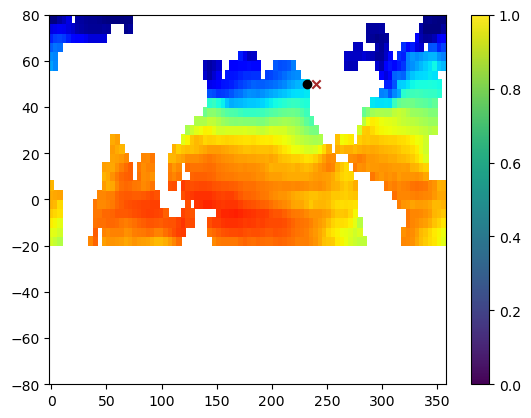

In [5]:
plt.pcolor(ds['XC'], ds['YC'], 
           ds['NaNmaskFinal']*ds['thetaSurf'].isel(time = 0), 
           cmap = 'jet', vmax = 35)
plt.scatter(240,50,marker = 'x', color = 'brown', label = "Objective function loc")
plt.scatter(232,50,marker = 'o', color = 'black', label = "Nearest wetpoint")
plt.colorbar()

In [6]:
cost = ds["thetaSurf"].sel(latitude=50.,longitude=232.)
wetpoints = np.nonzero(ds['maskFinal'].data)
thetaSurfWet = ds["thetaSurf"].data[:, wetpoints[0], wetpoints[1]]
saltSurfWet  = ds["saltSurf"].data[:, wetpoints[0], wetpoints[1]]
tauXWet      = ds["tauX"].data[:, wetpoints[0], wetpoints[1]]
tauYWet      = ds["tauY"].data[:, wetpoints[0], wetpoints[1]]
tauWet       = np.concatenate((tauXWet,tauYWet), axis = 1)

In [7]:
cost = ds["thetaSurf"].sel(latitude=50.,longitude=232.)
costOrig = np.copy(cost)
cost = cost - np.mean(cost)
scipy.signal.detrend(cost, axis=0, type='linear', bp=0, overwrite_data=True)
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
cost = np.convolve(cost, np.ones(60)/60, mode='valid')
oneHotCost = np.zeros((cost.shape[0], 2), dtype = int)
oneHotCost[:,0] = cost >= 0.0
oneHotCost[:,1] = cost <  0.0

thetaSurfWetOrig = np.copy(thetaSurfWet)
thetaSurfWet = thetaSurfWet - np.mean(thetaSurfWet, axis = 0)
scipy.signal.detrend(thetaSurfWet, axis=0, type='linear', bp=0, overwrite_data=True)

array([[-0.19391964, -0.07641776,  0.03569355, ..., -1.17395822,
        -1.50944615, -1.6948952 ],
       [-0.16583876, -0.05141728,  0.05708348, ..., -1.17813469,
        -1.50829162, -1.69375362],
       [-0.13734781, -0.02612307,  0.07850011, ..., -1.18098472,
        -1.507149  , -1.69262252],
       ...,
       [-0.24361363, -0.11900042,  0.00399473, ..., -1.17334275,
        -1.53909969, -1.72703828],
       [-0.21670005, -0.09474953,  0.0254743 , ..., -1.18186297,
        -1.53789843, -1.72586903],
       [-0.18940881, -0.07026785,  0.04689666, ..., -1.18887137,
        -1.53671219, -1.72470659]])

In [8]:
def quickSetup(X, y, X_full, numVars, lrp_methods, **NNkwargs):
    
    result = {}
    
    K = TrainFullyConnectedNN(X, y, **NNkwargs)
        
    best_model = K.quickTrain()
    result['cost_predict_NN'] = best_model.predict(X_full)
    normalizeDict = {'bool_': True, 'kind': 'MaxAbs'}
    kwargs = {'y_ref': 0.00}
    
    # Create model without trailing softmax
    model_wo_softmax = innvestigate.model_wo_softmax(best_model)
    result = {}
    for method in lrp_methods:
    
        title = method['title']
        print(f'Analyze using {title}')
        
        Xplain = XAIR(model_wo_softmax, method, 'classic', X_full, normalizeDict, **kwargs)
        a, _  = Xplain.quick_analyze()
        perVar = int(a.shape[1]/numVars)
        
        rel = np.zeros((numVars, a.shape[0], ny, nx))
        rel[:,:,:,:] = np.nan
            
        for numvar in range(numVars):
            rel[numvar,:,wetpoints[0],wetpoints[1]] = a[:,numvar*perVar:(numvar+1)*perVar].T
        result[method['name']] = rel
      
    return result

In [16]:
LayersTheta = [{'size': thetaSurfWet.shape[1], 'activation': None    , 'use_bias': None},
          {'size': 100                  , 'activation': 'relu'  , 'use_bias': True},
          {'size': 20                   , 'activation': 'relu'  , 'use_bias': True},
          {'size': 2                    , 'activation': 'softmax', 'use_bias': False}]
Losses = [{'kind': 'categorical_crossentropy', 'weight': 1.0}]

LRPDict_theta = {}
lagStepsList = [-60,0,60,90,120,180]

kwargs = {'losses': Losses, 'optim': 'adam', 'metrics': ['accuracy'],
            'batch_size': 10, 'epochs': 100, 'validation_split': 0.2,
            'filename': 'model', 'dirname': os.path.abspath('')}

methods = \
[dict(name='gradient',                     optParams = {"postprocess": "abs"}, title = 'Gradient'),
 # dict(name='guided_backprop',              optParams = {}                    , title = 'Guided Backprop'),
 dict(name='lrp.z',                        optParams = {}                    , title = 'LRP-Z'),
 dict(name='lrp.epsilon',                  optParams = {"epsilon": 1}        , title = 'LRP-Epsilon'),
 dict(name='lrp.alpha_1_beta_0',           optParams = {}                    , title = 'LRP-Alpha-1-Beta-0'),
 # dict(name='lrp.sequential_preset_a_flat', optParams = {"epsilon": 1}        , title = 'LRP-PresetAFlat'),
 # dict(name='lrp.sequential_preset_b_flat', optParams = {"epsilon": 1}        , title = 'LRP-PresetBFlat'),
]

In [17]:
for i in range(len(lagStepsList)):
    print(f'Lag: {lagStepsList[i]} days, for Theta')
    
    ### This is just a hack to automate stuff, it has no deep meaning
    ### It ensures X and y have the same size after the appropriate time lag
    Xi = (lagStepsList[i]>0)*0+(lagStepsList[i]<=0)*(30-lagStepsList[i])
    Xf = -29-lagStepsList[i] if lagStepsList[i]>=0 else None
    yi = lagStepsList[i]-30 if lagStepsList[i]>0 else 0
    yf = lagStepsList[i]+29 if lagStepsList[i]<0 else None
    
    LRPDict_theta[f'LRP{lagStepsList[i]}'] = quickSetup(thetaSurfWet[Xi:Xf], oneHotCost[yi:yf], 
                                                        thetaSurfWet, numVars = 1, 
                                                        lrp_methods = methods,
                                                        layers = LayersTheta, **kwargs)

Lag: -60 days, for Theta


2023-10-25 11:39:41.388101: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-10-25 11:39:41.389925: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-10-25 11:39:41.391673: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38251 MB memory:  -> device: 2, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:e2:00.0, compute capability: 8.0



Epoch 1: val_loss improved from inf to 0.01236, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 2: val_loss did not improve from 0.01236

Epoch 3: val_loss did not improve from 0.01236

Epoch 4: val_loss did not improve from 0.01236

Epoch 5: val_loss did not improve from 0.01236

Epoch 6: val_loss did not improve from 0.01236

Epoch 7: val_loss did not improve from 0.01236

Epoch 8: val_loss did not improve from 0.01236

Epoch 9: val_loss did not improve from 0.01236

Epoch 10: val_loss did not improve from 0.01236

Epoch 11: val_loss did not improve from 0.01236

Epoch 12: val_loss did not improve from 0.01236

Epoch 13: val_loss did not improve from 0.01236

Epoch 14: val_loss improved from 0.01236 to 0.00649, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 15: val_loss improved from 0.00649 to 0.00489, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 16: val_loss did not improve from 0.00489

Epoch 17: val_loss did not 

2023-10-25 11:48:16.486729: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-10-25 11:48:16.488578: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-10-25 11:48:16.490306: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38251 MB memory:  -> device: 2, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:e2:00.0, compute capability: 8.0



Epoch 1: val_loss improved from inf to 0.02972, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 2: val_loss improved from 0.02972 to 0.01196, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 3: val_loss improved from 0.01196 to 0.00312, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 4: val_loss did not improve from 0.00312

Epoch 5: val_loss did not improve from 0.00312

Epoch 6: val_loss did not improve from 0.00312

Epoch 7: val_loss improved from 0.00312 to 0.00258, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 8: val_loss did not improve from 0.00258

Epoch 9: val_loss did not improve from 0.00258

Epoch 10: val_loss did not improve from 0.00258

Epoch 11: val_loss improved from 0.00258 to 0.00172, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 12: val_loss did not improve from 0.00172

Epoch 13: val_loss did not improve from 0.00172

Epoch 14: val_loss did not improve from 

2023-10-25 11:58:42.979080: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-10-25 11:58:42.980919: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-10-25 11:58:42.982667: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38251 MB memory:  -> device: 2, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:e2:00.0, compute capability: 8.0



Epoch 1: val_loss improved from inf to 0.01196, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 2: val_loss improved from 0.01196 to 0.01115, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 3: val_loss did not improve from 0.01115

Epoch 4: val_loss did not improve from 0.01115

Epoch 5: val_loss improved from 0.01115 to 0.00889, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 6: val_loss improved from 0.00889 to 0.00588, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 7: val_loss did not improve from 0.00588

Epoch 8: val_loss did not improve from 0.00588

Epoch 9: val_loss did not improve from 0.00588

Epoch 10: val_loss did not improve from 0.00588

Epoch 11: val_loss did not improve from 0.00588

Epoch 12: val_loss did not improve from 0.00588

Epoch 13: val_loss did not improve from 0.00588

Epoch 14: val_loss did not improve from 0.00588

Epoch 15: val_loss did not improve from 0.00588

Epoch 16:

2023-10-25 12:07:21.932128: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-10-25 12:07:21.933984: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-10-25 12:07:21.935727: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38251 MB memory:  -> device: 2, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:e2:00.0, compute capability: 8.0



Epoch 1: val_loss improved from inf to 0.03053, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 2: val_loss did not improve from 0.03053

Epoch 3: val_loss improved from 0.03053 to 0.01779, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 4: val_loss did not improve from 0.01779

Epoch 5: val_loss improved from 0.01779 to 0.01272, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 6: val_loss did not improve from 0.01272

Epoch 7: val_loss did not improve from 0.01272

Epoch 8: val_loss improved from 0.01272 to 0.00993, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 9: val_loss did not improve from 0.00993

Epoch 10: val_loss did not improve from 0.00993

Epoch 11: val_loss improved from 0.00993 to 0.00960, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 12: val_loss did not improve from 0.00960

Epoch 13: val_loss did not improve from 0.00960

Epoch 14: val_loss did not improve from 

2023-10-25 12:16:42.671302: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-10-25 12:16:42.679775: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-10-25 12:16:42.681516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38251 MB memory:  -> device: 2, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:e2:00.0, compute capability: 8.0



Epoch 1: val_loss improved from inf to 0.02739, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 2: val_loss improved from 0.02739 to 0.01999, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 3: val_loss improved from 0.01999 to 0.01251, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 4: val_loss did not improve from 0.01251

Epoch 5: val_loss did not improve from 0.01251

Epoch 6: val_loss did not improve from 0.01251

Epoch 7: val_loss improved from 0.01251 to 0.01234, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 8: val_loss did not improve from 0.01234

Epoch 9: val_loss improved from 0.01234 to 0.00876, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 10: val_loss improved from 0.00876 to 0.00789, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 11: val_loss did not improve from 0.00789

Epoch 12: val_loss did not improve from 0.00789

Epoch 13: val_loss did

2023-10-25 12:25:31.924847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-10-25 12:25:31.926711: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-10-25 12:25:31.928454: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38251 MB memory:  -> device: 2, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:e2:00.0, compute capability: 8.0



Epoch 1: val_loss improved from inf to 0.03116, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 2: val_loss improved from 0.03116 to 0.01486, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 3: val_loss improved from 0.01486 to 0.01193, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 4: val_loss did not improve from 0.01193

Epoch 5: val_loss did not improve from 0.01193

Epoch 6: val_loss did not improve from 0.01193

Epoch 7: val_loss did not improve from 0.01193

Epoch 8: val_loss did not improve from 0.01193

Epoch 9: val_loss did not improve from 0.01193

Epoch 10: val_loss did not improve from 0.01193

Epoch 11: val_loss did not improve from 0.01193

Epoch 12: val_loss did not improve from 0.01193

Epoch 13: val_loss improved from 0.01193 to 0.00769, saving model to /home1/07665/shrey911/XAIRT/examples/model.h5

Epoch 14: val_loss did not improve from 0.00769

Epoch 15: val_loss improved from 0.00769 to 0.00736, savin

type: 'lrp.LR'

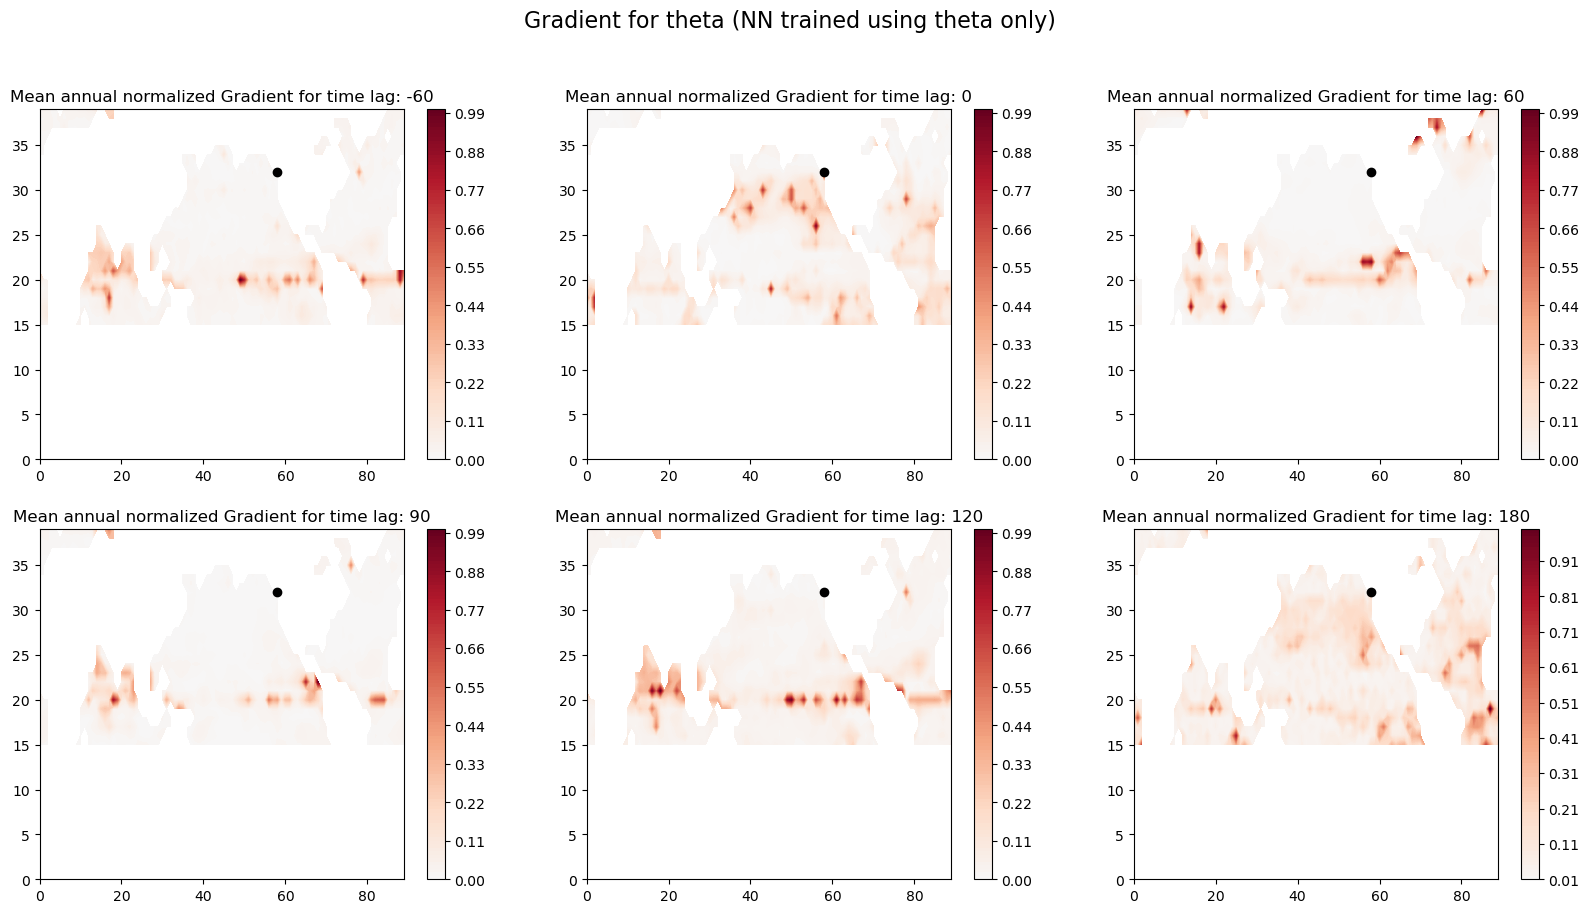

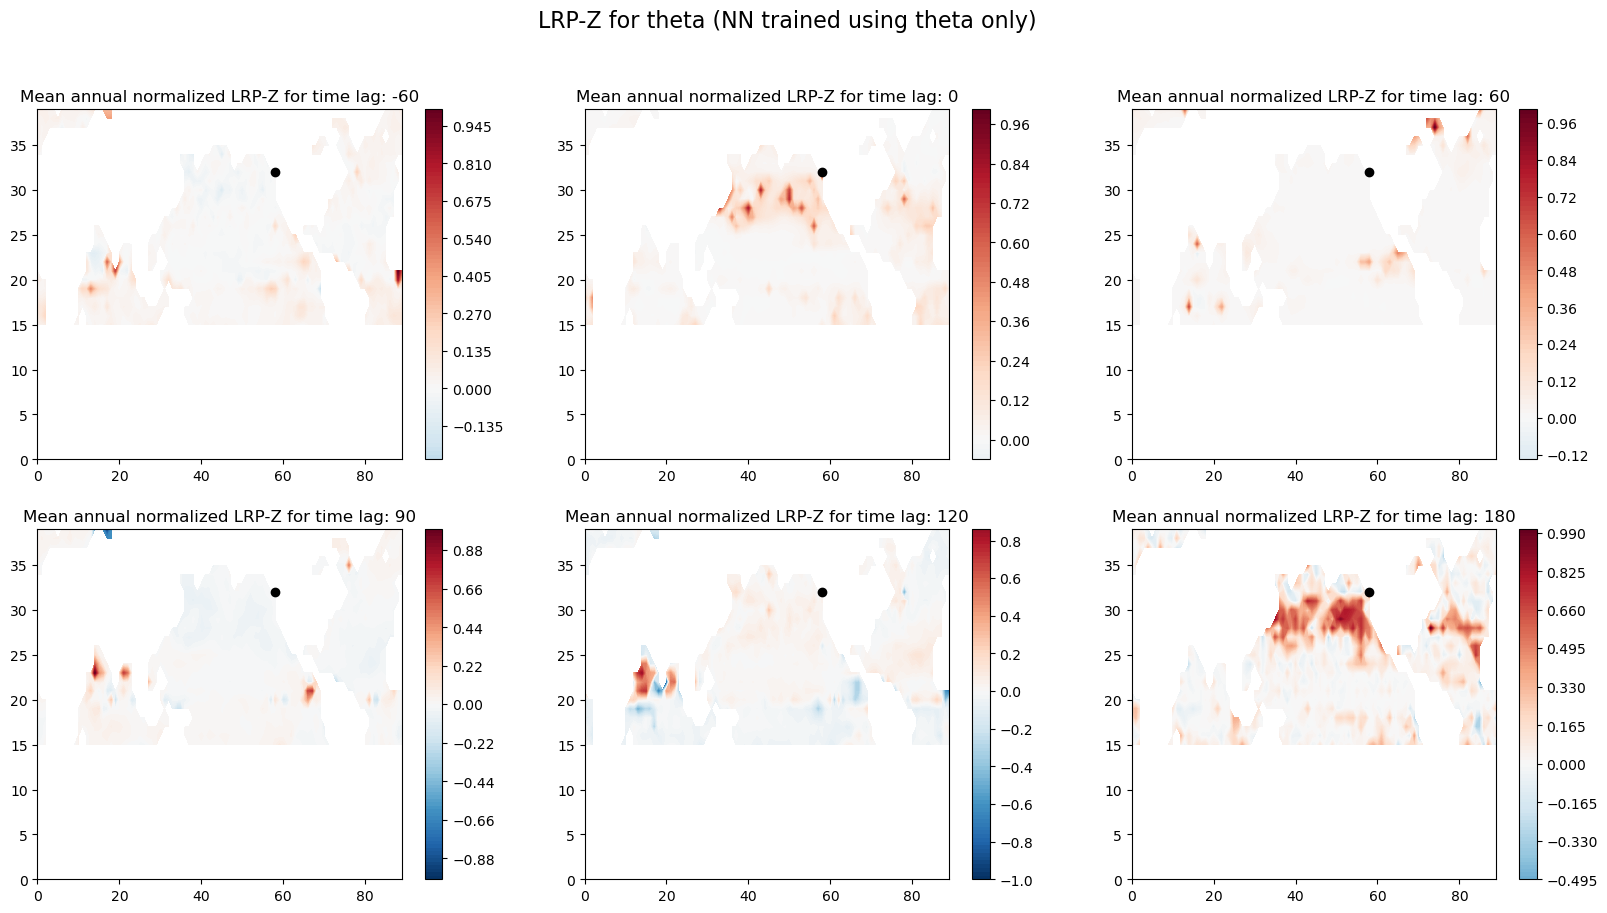

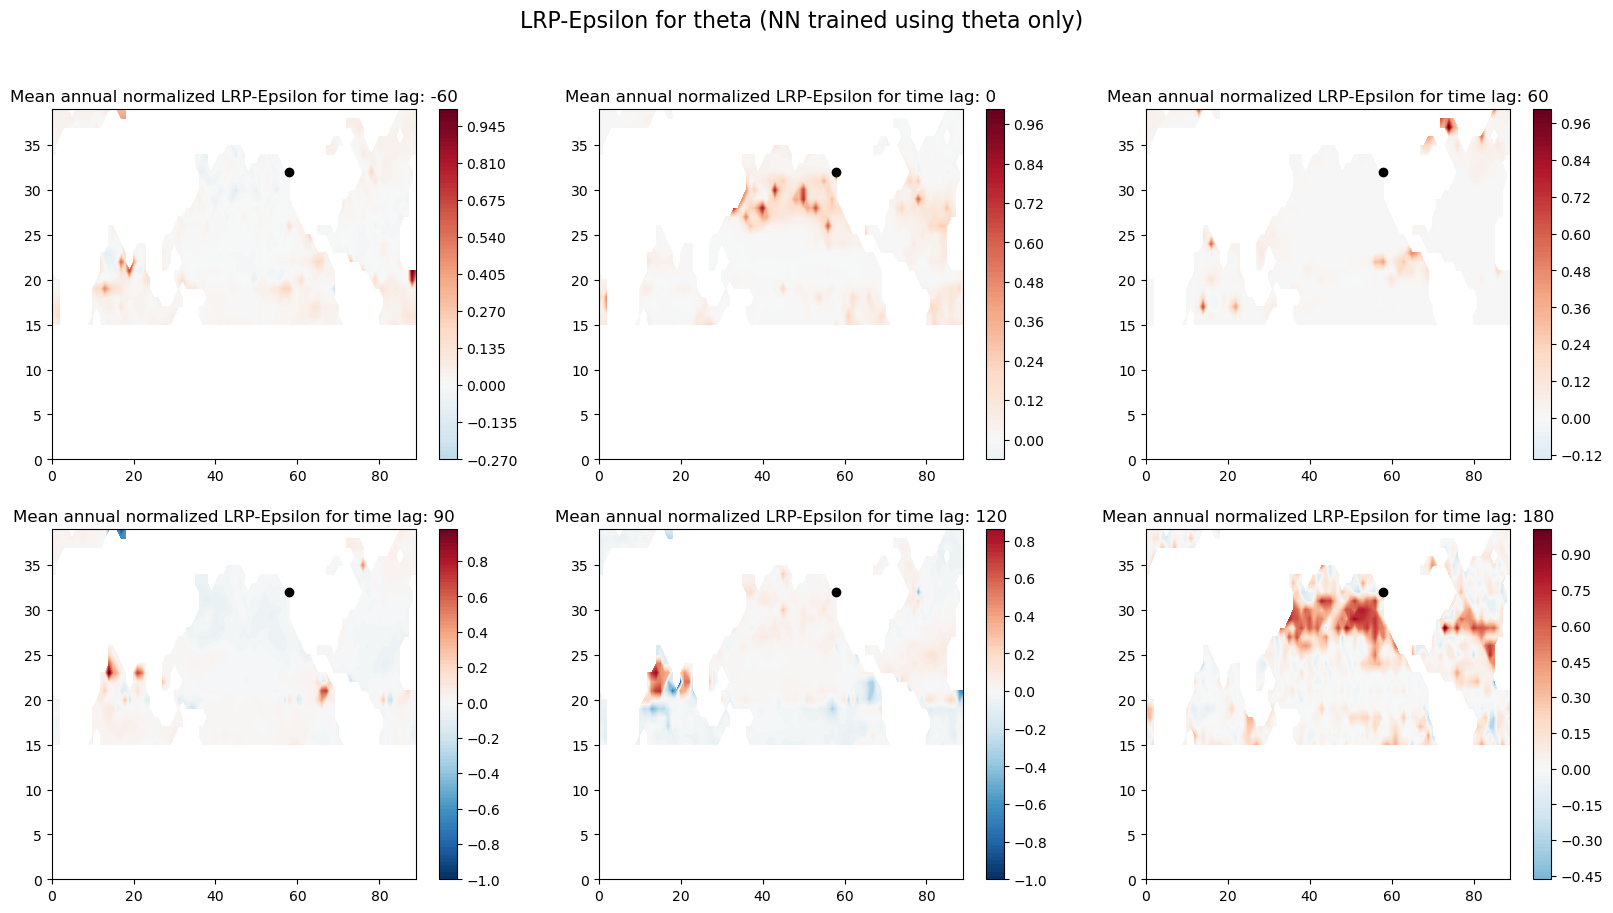

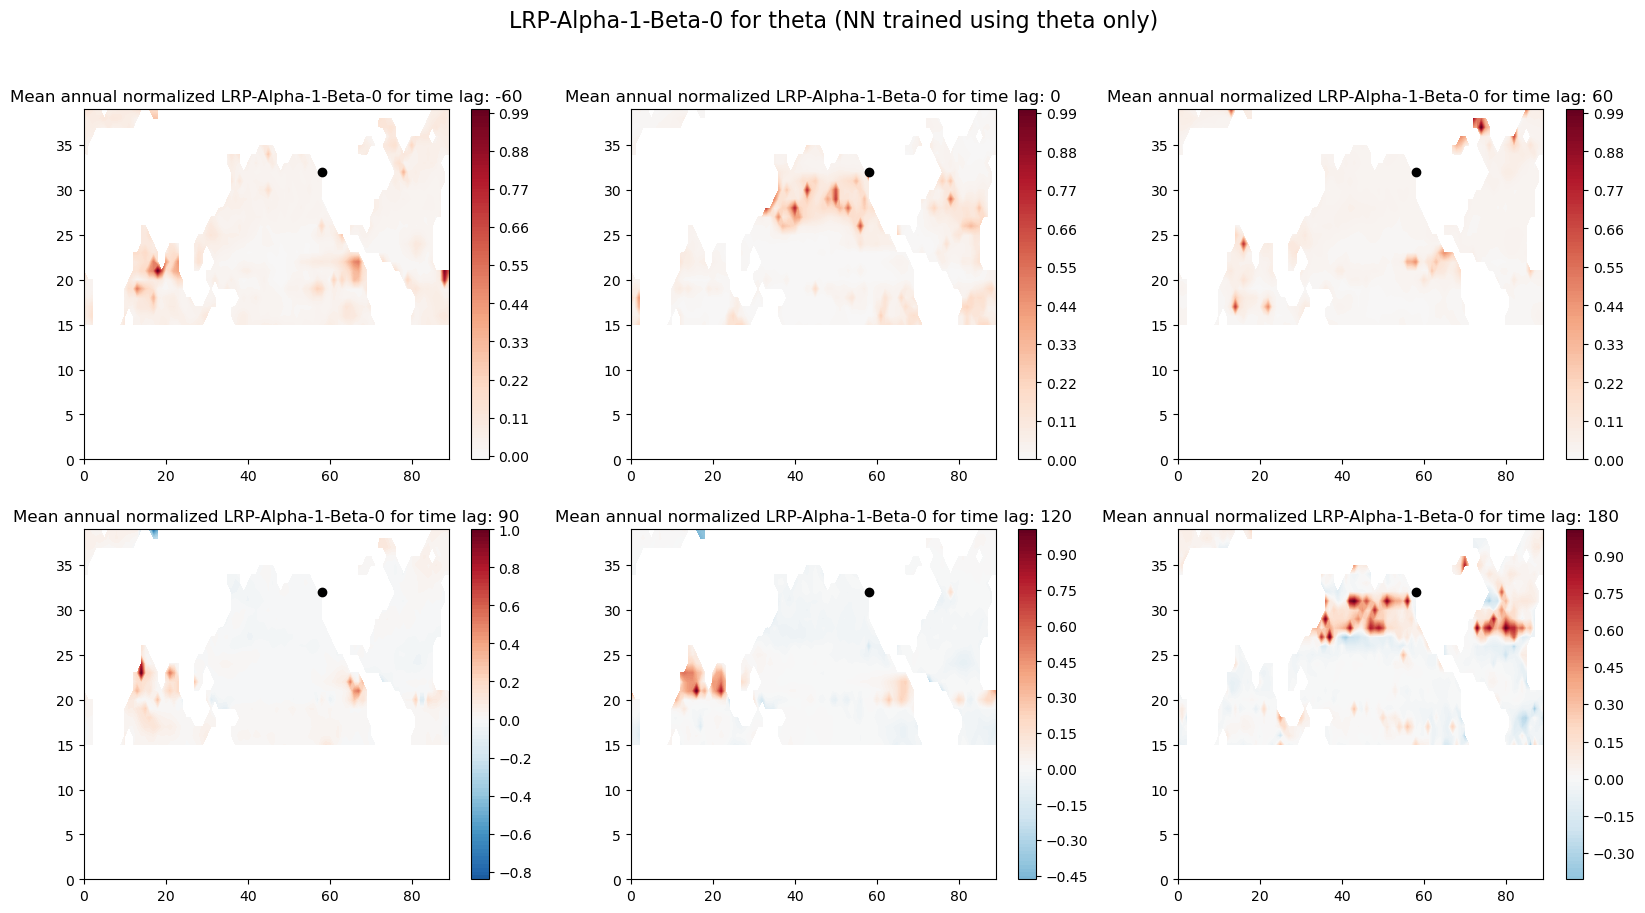

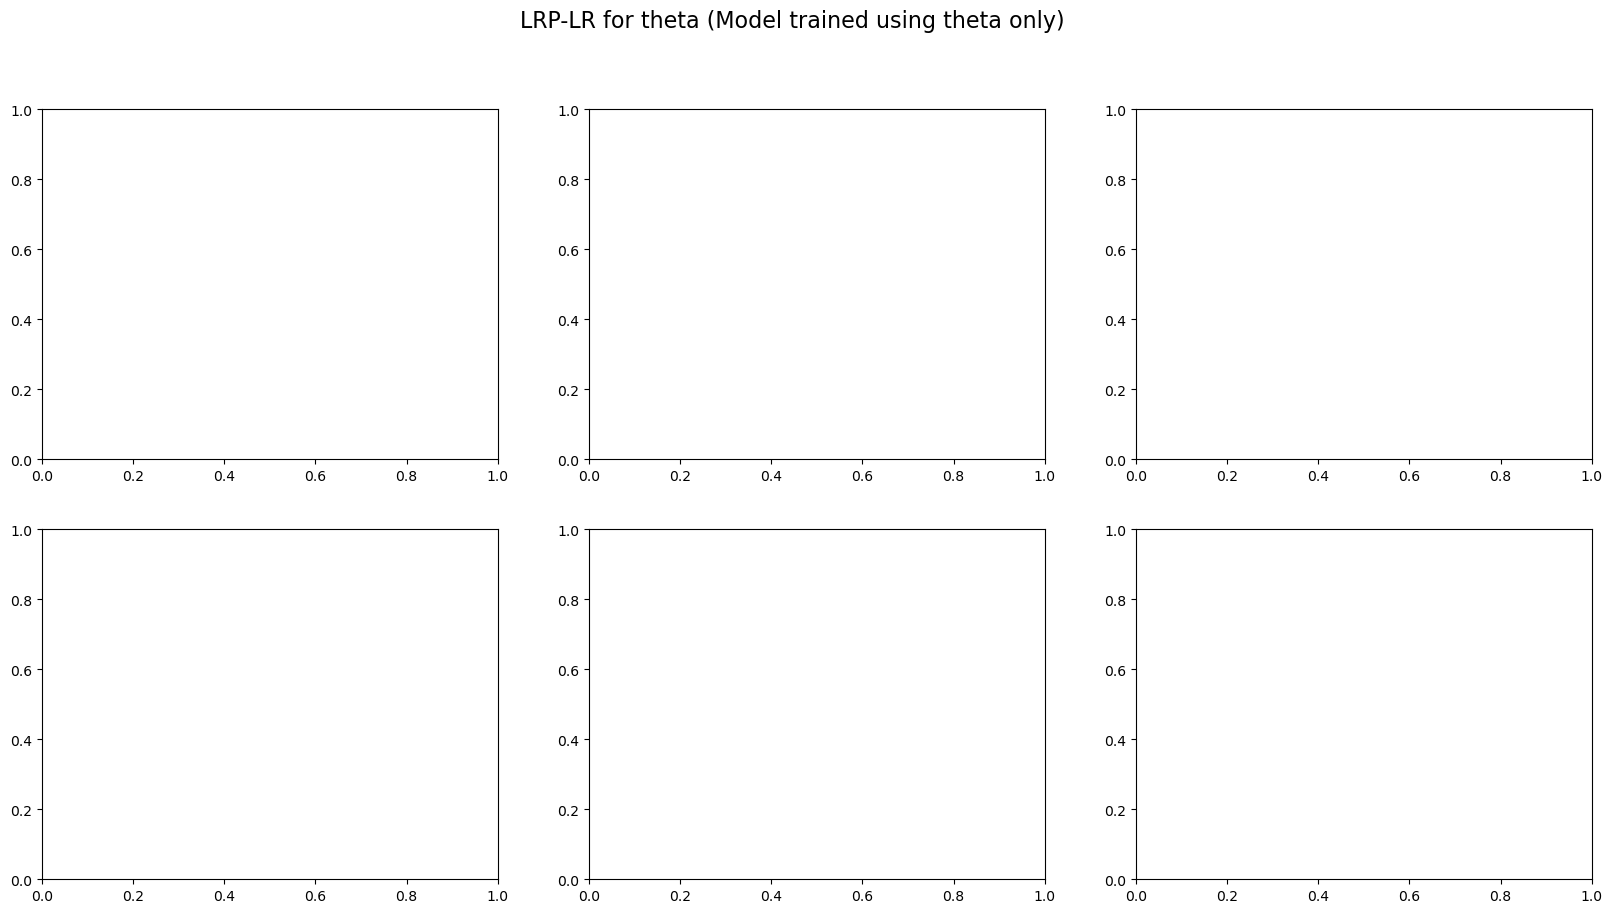

In [18]:
for method in methods:

    plt.rcParams["figure.figsize"] = (20,10)
    fig, ax = plt.subplots(2,3)
    pltX = 0
    pltY = 0
    fig.suptitle(f'{method["title"]} for theta (NN trained using theta only)', fontsize=16)
    
    for i in range(len(lagStepsList)):
        pltX = int(i/3)
        pltY = int(i%3)
    
        field = np.nanmean(LRPDict_theta[f'LRP{lagStepsList[i]}'][method['name']][0], axis = 0)
        field = field / np.nanmax(np.abs(field))
        
        p = ax[pltX,pltY].contourf(field, vmin = -1, vmax = 1, levels = 100, cmap = 'RdBu_r')
        ax[pltX,pltY].scatter([58],[32], color = 'black')
        fig.colorbar(p, ax=ax[pltX,pltY])
        ax[pltX,pltY].set_title(f'Mean annual normalized {method["title"]} for time lag: {lagStepsList[i]}')